# 지도학습(Supervised) 알고리즘 : 회귀분석

<img src='img/Advanced_Algorithms_SupervisedRegression.png'>

#### 0) 실제 데이터분석 접근 방법 : 편향과 분산 모두 최소화하기 위해 반복적으로 업데이트

<img src='img/Bias_Variance4.png' width=400>

"Train 데이터의 Bias가 적절(낮게)한지 확인 후, Test 데이터에 적용하여 Variance가 적절(낮게)하도록 반복적 업데이트"

- Train의 Bias가 높다면,  빅데이터(Row & Column) 또는 알고리즘 복잡하게 또는 최적화를 통해 해결

- Test의 Variance가 높다면, 빅데이터(Row) & 스몰데이터(Column) 또는 알고리즘 덜 복잡하게 또는 최적화를 통해 해결

<img src='img/Bias_Variance_Reduce.png'>

- 딥러닝(인공지능 알고리즘): 딥러닝은 엄청나게 복잡한 모델이며 Bias-variance Trade-off를 피할 수 없음

- 스몰데이터의 딥러닝은 과대적합되어 High Variance가 우려되기에, 딥러닝으로 성능을 내기 위해선 빅데이터가 반드시 필요!

- 빅데이터를 통해 Train과 Test의 패턴 차이 감소되어 Bias & Variance를 모두 감소시키기 유리

#### 1) 정규화 방법론

"모델링은 목적 달성을 위해 특정 비용함수를 최소화 하는 최적화 알고리즘을 사용하여 분석 알고리즘을 최적화하여 문제해결하는 것"

| | **Regression** | **Classification** |
|:-:|:-|:-|
| **분석목적** | 수치 예측 | 라벨 예측 |
| **분석단계** |  |  |
| <span style="color:blue">전처리</span> | 동일 | 동일 |
| <span style="color:red">Base 알고리즘</span> | Linear Regression | Logistic Regression |
| <span style="color:blue">특징</span> | 선형 | 선형 |
| <span style="color:red">비용함수</span> | $(Y - \hat{Y})^2$ | $-\hat{Y}log(Pr(\hat{Y}))$ $-$ $(1-\hat{Y})log(1-Pr(\hat{Y}))$ |
| <span style="color:red">검증지표</span> | MSE<br>     MAE<br>     RMSE<br>     MAPE<br>     R^2<br>     F검정<br>     t검정<br>     Log-Likelihood<br>     AIC<br>     BIC | Log-Likelihood<br>     Confusion Matrix<br>     Accuracy<br>     Precision<br>     Recall<br>     F1-score<br>     Classification Report<br>     ROC<br>     AUC |
| <span style="color:red">잔차진단</span> | 정규분포<br>     자기상관<br>     등분산성 | - |
| **Advanced 알고리즘** | - Linear regression<br>     - Polynomial regression<br>     - Stepwise regression<br>     - Ridge/Lasso/ElasticNet regression<br>     - Bayesian Linear regression<br>     - Quantile regression<br>     - Decision Tree regression<br>     - Random Forest regression<br>     - Support Vector regression | - Logistic Regression<br>     - Ordinal Regression<br>     - Cox Regression<br>     - Naïve Bayes<br>     - Stochastic Gradient Descent<br>     - K-Nearest Neighbours<br>     - Decision Tree<br>     - Random Forest<br>     - Support Vector Machine |

- Linear Regression: 수치예측을 위해 MSE 비용함수를 최소화 하는 최소제곱법을 사용하여 Linear Regression을 최적화하여 가중치를 추정(문제해결)

- Logistic Regression: 분류예측을 위해 Cross Entropy 비용함수를 최소화 하는 수치해석 방법론을 사용하여 Logistic Regression을 최적화하여 가중치를 추정(문제해결)

- 결국 모델링은 다양한 가중치/계수/파라미터 후보들 중에서 비용함수에 따라 특정 가중치/계수/파라미터가 선택되는 과정

- 정규화(Regularized)

    "비용함수에 제약을 적용하여 추정해야 하는 가중치/계수/파라미터의 범위/자유도를 제한하여 급격한 수치의 가중치/계수/파라미터가 추정되지 않도록 하여 과대적합 발생을 줄이는 방법론"

    <img src='img/Regularization_Intuition.png'>

    - 접근: 과적합 가능성이 있을 시 비용함수에 제약/패널티를 부과

    - 결과: 추정 가중치의 갯수를 줄이거나 크기를 조정하여 모델 단순화 및 비극단적 수치 추청

    - 성능

        - 모델이 단순화되기 때문에, Variance 감소 상대적으로 Bias 증가 (by Bias-variance Trade-off)

        - Linear Regression에선 $X^TX$의 역행렬 미존재 이슈가 있지만 정규화 알고리즘은 역행렬 항상 존재

    - 동의어: Regularized Method, Penalized Method, Contrained Least Squares


## 정규화 방법론 (Regulazied Method)

#### 0) Linear Regression : MSE를 비용함수로 사용

$$\hat{w}=\underset{w}\argmin\left[\sum_{j=1}^i\left(y_j-\sum_{i=0}^kw_ix_{ij}\right)^2\right]$$

#### 1) Ridge Regression

- 정규화조건/패널티/제약조건: 모든 가중치($w$)들의 제곱합을 비용함수에 추가

$$\hat{w}=\underset{w}\argmin\left[\sum_{j=1}^t\left(y_i-\sum_{i=0}^k w_ix_ij\right)+\lambda\sum_{i=0}^k w_i^2\right] \\ \text{whsere } \lambda \text{ is hyper parameter (given by human)}$$

- 하이퍼파라미터($\lambda$): 기존 MSE에 추가될 제약 조건의 비중

    - $\lambda=0$ : 일반적인 Linear Regression

    - $\lambda$가 커지면, 정규화(패널티) 정도가 커지기 때문에 가중치($w_1$) 작아짐

    - $\lambda$가 작아지면, 정규화(패널티) 정도가 작아 지기 때문에 가중치 ($w_i$) 자유도가 높아져 커짐

<img src='img/Regularization_Ridge.png' width=500>

#### 2) Lasso (Least Absolute Shrinkage and Selection OPerator) Regression

- 정규화조건/패널티/제약조건: 모든 가중치($w$)들의 절대값 합을 비용함수에 추가

$$\hat{w}=\underset{w}\argmin\left[\sum_{j=1}^t\left(y_i-\sum_{i=0}^k w_ix_ij\right)+\lambda\sum_{i=0}^k |w_i|\right] \\ \text{whsere } \lambda \text{ is hyper parameter (given by human)}$$

<img src='img/Regularization_Lasso.png' width=500>

#### 3) Elastic Net : Ridge + Lasso

- 정규화조건/패널티/제약조건: 추정 가중치의  절대값 합과 제곱합을 동시에 최소


$$\hat{w}=\underset{w}\argmin\left[\sum_{j=1}^t\left(y_i-\sum_{i=0}^k w_ix_ij\right)+\lambda_1\sum_{i=0}^k |w_i| + \lambda_2\sum_{i=0}^k w_i^2 \right] \\ \text{whsere } \lambda \text{ is hyper parameter (given by human)}$$

## 하이퍼파라미터에 따른 결과 비교

#### 1) 파라미터 vs 하이퍼파라미터

- 파라미터(Parameter): 데이터의 의해 결정되는 모델의 성질을 의미하는 가중치/계수/매개변수

- 하이퍼파라미터(Hyperparameter): 모델링 할 때 사용자/분석가가 직접 결정하는 값

    - 정해진 최적 값은 없음

    - 통계추론 알고리즘 외에 머신러닝/딥러닝으로 갈수록 하이퍼파라미터의 갯수는 늘어남

    - 일반적으로 자동화란, 머신러닝/딥러닝은 사람에 따라 결과가 달라질 수 있기 때문에 하이퍼파라미터를 고성능 컴퓨터를 사용해서 모든 경우의 수를 실행하며 최적화하는 과정

#### 2) 하이퍼파라미터 최적화에 따른 학습/예측 성능: 예측을 잘 하려면 별도 추정 필요

- Train: 하이퍼파라미터가 작을수록 성능이 좋아짐(과최적화)

- Test: 하이퍼파라미터가 특정한 범위에 있을때 좋아짐(추정필요)

#### 3) 하이퍼파라미터 별 정규화 알고리즘 비교

<b>(0) Linear Regression</b>

<img src='img/Regression_Result_Standard.png'>

<b>(1) Ridge Regression</b>

- 알고리즘이 모든 변수들을 포함하려 하기 때문에 가중치의 크기가 작아지고 모형의 복잡도 줄어듬

- 변수의 수가 많은 경우 효과가 적으나 과적합 방지에 효과적

- 다중공선성 존재할 경우, 변수 간 상관관계에 따라 가중치로 다중공선성이 분산되기에 효과 높음

    - 다중공선성이 변수간 상관관계가 존재한다는 의미로 $\lambda$가 커지면 다중공산성이 분산되기에 효과가 높음 $\rightarrow$ 100개 변수가 있더라도 독립 변수가 10개만 있는 경우 linear regression에 비해 ridge는 변수의 가중치를 줄이기 때문에 분산 효과가 있음

- Ridge는 모든 변수가 중요할 때 사용, Lasso는 중요하지 않은 변수 제거 시 사용

<center><img src='img/Regression_Result_Ridge1.png' width='400'><img src='img/Regression_Result_Ridge2.png' width='400'></center>

<b>(2) LASSO Regression</b>

- 알고리즘이 최소한의 변수를 포함하려 하기 때문에 나머지 가중치는 0이됨 (Feature Selection 기능)

- 변수선택 기능이 있기에 일반적으로 많이 사용되지만 특정변수에 대한 가중치 증가 단점

- 다중공선성이 존재할 경우, 특정 변수만을 선택하는 방식이라 Ridge에 비해 효과 높을 수 있음

<center><img src='img/Regression_Result_Lasso1.png' width='400'><img src='img/Regression_Result_Lasso2.png' width='400'></center>

<b>(3) Elastic Net Regression</b>

- 큰 데이터셋에서 Ridge와 LASSO의 효과를 모두 반영 (적은 데이터셋은 효과 낮음)

<img src='img/Regression_Result_EN.png' width=400>

## 사용방법 및 알고리즘 결과비교



#### 1) `statsmodel` : `Linear Regression' 클래스의 fit_regularized` 메서드를 사용하여 Ridge/LASSO/Elastic Net 추정

<b>Ridge</b>
$$\lambda_1=0, 0<\lambda_2<1\\
\Rightarrow L_1=0, \alpha\ne0$$

<b>LASSO</b>
$$0<\lambda_1<1, \lambda_2\\
\Rightarrow L_1=1, \alpha\ne0$$

<b>Elastic Net</b>
$$0<(\lambda_1, \lambda_2)<1\\
\Rightarrow 0<L_1<1,\alpha\ne 0$$

#### 2) `sklearn` : 정규화 모형을 위한 `Ridge`, `Lasso`, `ElasticNet` 클래스 제공

```python
from sklearn.linear_model import Ridge, Lasso, ElasticNet
```

- [**Ridge**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

$$ 0<(\lambda = \alpha) < 1 $$

```python
model_ridge = Ridge(alpha=0.5, fit_intercept=True, normalize=True, random_state=123)
model_ridge.fit(X_train, Y_train)
Y_trpred = model_ridge.predict(X_train)
Y_tepred = model_ridge.predict(X_test)
```

- [**LASSO**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)


$$0<(\lambda=\alpha)<1$$

```
model_lasso = Lasso(alpha=0.5, fit_intercept=True, normalize=True, random_state=123)
model_lasso.fit(X_train, Y_train)
Y_trpred = model_lasso.predict(X_train)
Y_tepred = model_lasso.predict(X_test)
```

- [**Elastic Net**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

$$0<(\lambda_1, \lambda_2) < 1\\
\Rightarrow 0 <L_1 < 1, \alpha\ne 0$$

```
model_en = ElasticNet(alpha=0.1, l1_ratio=1, fit_intercept=True, normaliZe=True, random_state=123)
model_en.fit(X_train, Y_train)
Y_trpred = model_en.predict(X_train)
Y_tepred = model_en.predict(X_test)
```

#### 3) [`keras`](https://keras.io/api/layers/regularizers/)

- regularizer 파라미터를 사용 및 Dropout 레이어를 사용하여 일부 가중치만 추정 효과

```
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
```

```
# Elastic Net
inputs = Input(shape=[X_train.shape[1], ])
outputs = Dense(1, activation='linear', kernel_regularizer=regularizer.l1_l2(l1=0.1, l2=0.01))(inouts)
outputs = Dropout(0.2)(outputs)

model_Regul = Model(inputs, outputs)
Y_trpred = moddel_Regul.predict(X_train)
Y_tepred = model_Regul.predict(X_test)
```

In [1]:
# import libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [2]:
# create datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target
pd.concat([pd.DataFrame(Y, columns=['diabetes_value']), 
           pd.DataFrame(X, columns=diabetes.feature_names)], axis=1).head()

,diabetes_value,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
# setting hyperparameters
# creating model
# fitting datasets

alpha_weight = 0.5
model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True, random_state=123)
model_ridge.fit(X, Y)
coef_ridge = pd.DataFrame(np.hstack([model_ridge.intercept_, model_ridge.coef_]), columns=['Ridge'])

coef_ridge

,Ridge
0,152.133484
1,20.138007
2,-131.241495
3,383.483704
4,244.835070
5,-15.186741
6,-58.344136
7,-174.842371
8,121.984950
9,328.498757


In [4]:
# setting hyperparameters
# creating model
# fitting datasets
# learning weights
alpha_weight = 0.5
model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True, random_state=123)
model_lasso.fit(X, Y)
coef_lasso = pd.DataFrame(np.hstack([model_lasso.intercept_, model_lasso.coef_]), columns=['Lasso'])

coef_lasso

,Lasso
0,152.133484
1,0.000000
2,-0.000000
3,471.041874
4,136.504084
5,-0.000000
6,-0.000000
7,-58.319017
8,0.000000
9,408.022685


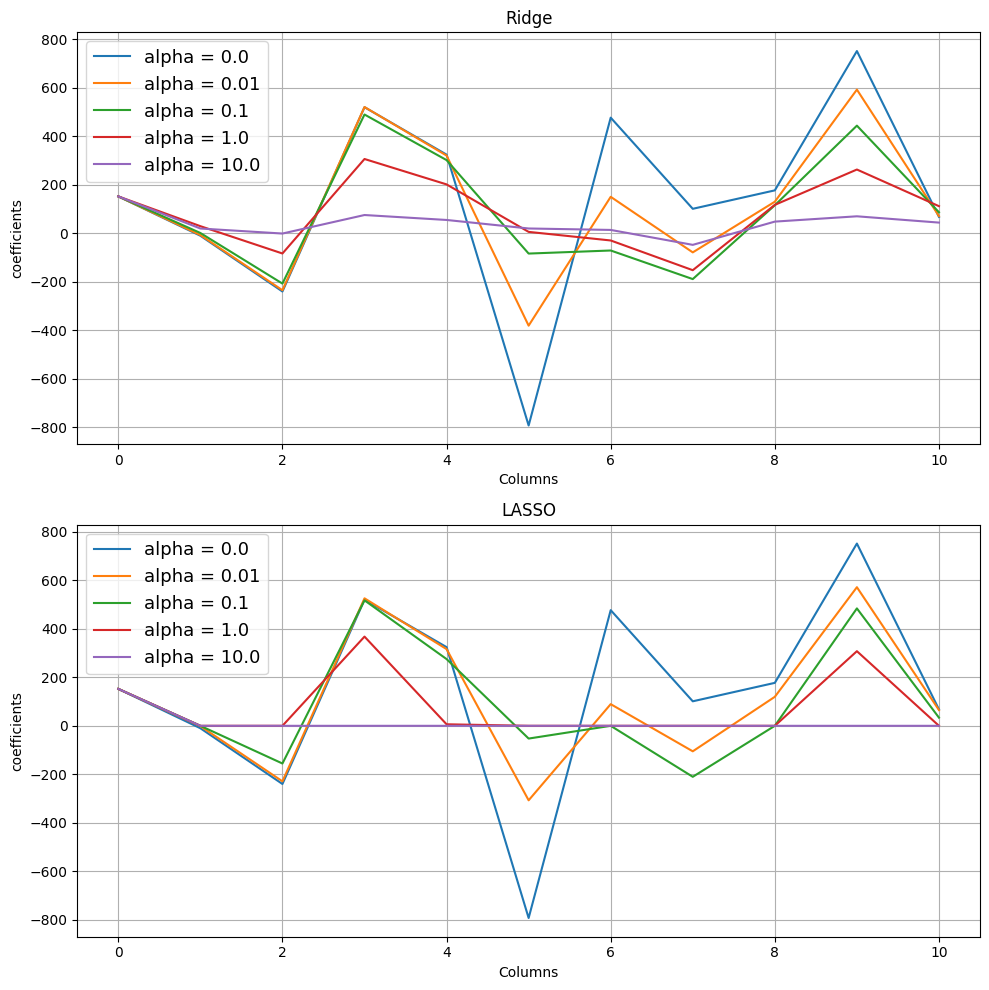

In [5]:
# 하이퍼파라미터 별 추정 가중치의 크기 감소 비교
result_Ridge = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha_weight in alpha_candidate:
    model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True, random_state=123)
    model_ridge.fit(X, Y)
    result_coef = pd.DataFrame(np.hstack([model_ridge.intercept_, model_ridge.coef_]), 
                               columns=['alpha = {}'.format(alpha_weight)])

    result_Ridge = pd.concat([result_Ridge, result_coef], axis=1)

result_LASSO = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha_weight in alpha_candidate:
    model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True, random_state=123)
    model_lasso.fit(X, Y)
    result_coef = pd.DataFrame(np.hstack([model_lasso.intercept_, model_lasso.coef_]), 
                               columns=['alpha = {}'.format(alpha_weight)])
    
    result_LASSO = pd.concat([result_LASSO, result_coef], axis=1)

result_Ridge.plot(figsize=(10, 10), legend=True, ax=plt.subplot(211))
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.grid()

result_LASSO.plot(legend=True, ax=plt.subplot(212))
plt.title('LASSO')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.tight_layout()
plt.grid()
plt.show()

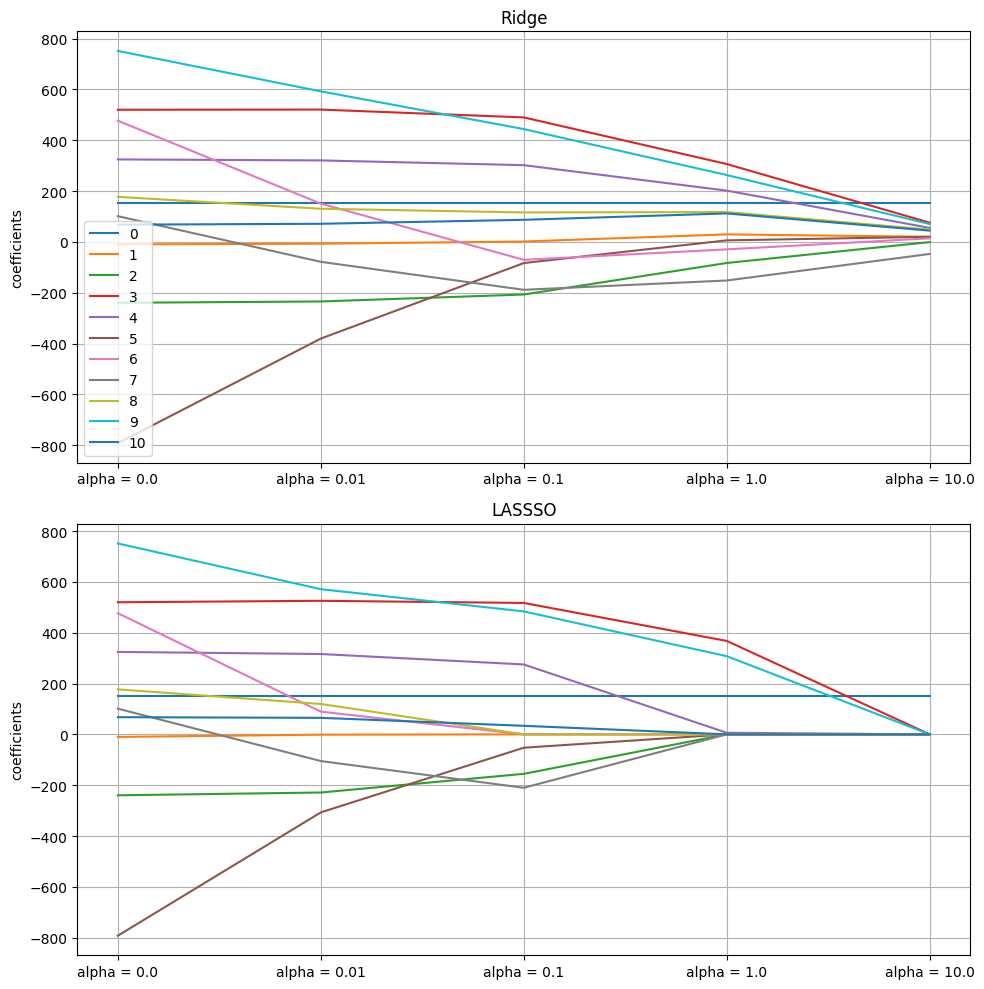

In [6]:
# 하이퍼파라미터 별 추정 가중치의 감소 속도 비교
result_Ridge.T.plot(figsize=(10, 10), legend=True, ax=plt.subplot(211))
plt.title('Ridge')
plt.xticks(np.arange(len(result_Ridge.columns)), [i for i in result_Ridge.columns])
plt.ylabel('coefficients')
plt.grid()

result_LASSO.T.plot(legend=False, ax=plt.subplot(212))
plt.title('LASSSO')
plt.xticks(np.arange(len(result_LASSO.columns)), [i for i in result_LASSO.columns])
plt.ylabel('coefficients')
plt.tight_layout()
plt.grid()
plt.show()

In [7]:
# setting hyperparameters
# creating model
# fitting datasets
# 추정 가중치 확인
model_en = ElasticNet(alpha=0.1, l1_ratio=0.9, fit_intercept=True, random_state=123)
model_en.fit(X, Y)
coef_en = pd.DataFrame(np.hstack([model_en.intercept_, model_en.coef_]), columns=['Elastic Net'])

coef_en

,Elastic Net
0,152.133484
1,23.622324
2,-2.959355
3,133.398019
4,92.595277
5,21.034549
6,8.266501
7,-75.966633
8,73.503804
9,120.612800


In [8]:
# 계수 결과 비교
pd.concat([coef_ridge, coef_lasso, coef_en], axis=1)

,Ridge,Lasso,Elastic Net
0,152.133484,152.133484,152.133484
1,20.138007,0.000000,23.622324
2,-131.241495,-0.000000,-2.959355
3,383.483704,471.041874,133.398019
4,244.835070,136.504084,92.595277
5,-15.186741,-0.000000,21.034549
6,-58.344136,-0.000000,8.266501
7,-174.842371,-58.319017,-75.966633
8,121.984950,0.000000,73.503804
9,328.498757,408.022685,120.612800


## 회귀문제 목적별 알고리즘 종류

- **변수 세팅에 따른 분류**

<img src="img/Regression-Algorithms-Tree1.png"> 

- Auto-regressive : y를 다시 x로 활용

- **해결 문제에 따른 분류**

<img src="img/Regression-Algorithms-Tree2.png">

# 지도학습(Supervised) 알고리즘 : 분류분석

<img src='img/Advanced_Algorithms_SupervisedClassification.png'>

## 정규화 방법론 (Regularized Method)

#### 1) Linear Regression : `MSE`를 비용함수로 사용

$$\hat{w}=\underset{w}\argmin\left[\sum_{j=1}^t\left(y_j-\sum_{i=0}^k w_ix_{ij}\right)^2\right]$$

- **Elastic Net**

$$\hat{w}=\underset{w}\argmin\left[\sum_{j=1}^t\left(y_j-\sum_{i=0}^kw_ix_{ij}\right)^2+\lambda_1\sum_{i=0}^k|w_i|+\lambda_2\sum_{i=0}^kw_i^2\right]\\
\text{where }\lambda_1 \text{ and } \lambda_2 \text{ are hyper parameters(given by humans)}$$

#### 2) Logistic Regression : `Cross Entropy`를 비용함수로 사용

$$\hat{w}=\underset{w}\argmin\left[\sum_{i=1}^m\left[-\hat{Y}_i\log(Pr(\hat{Y}_i))-(1-\hat{Y}_i\log(1-Pr(\hat{Y}_i))\right]\right]$$

- **Regularized Logistic Regression**

$$\hat{w}=\underset{w}\argmin\left[\sum_{i=1}^m\left[-\hat{Y}_i\log(Pr(\hat{Y}_i))-(1-\hat{Y}_i)\log(1-Pr(\hat{Y}_i))\right]+\frac{\lambda_1}{2}\sum_{i=0}^k|w_i|+\frac{\lambda_2}{2}\sum_{i=0}^kw_i^2\right]$$

<img src='img/Regularization_Logistic.png' width=500>

## K 최근접 이웃(K-Nearest Neighbors, KNN)

#### 1) 알고리즘 함수세팅 : 직관적으로 분류하는 가장 간단한 알고리즘

<img src='img/Advanced_KNN_Estimation.jpg' width=600>

- 학습(Learing)으로 볼만한 과정이 없고 샘플(Observation)들의 위치만 기억

- 별도 모델링 작업이 없다라는 뜻으로 게으른 알고리즘(Lazy Algorithm)이라고도 함
    - 데이터로부터 모델을 생성해서 임무를 수행하는 대부분의 머신러닝 모델기반 학습과 대비

- 새로운 데이터에 대해, 기존 데이터 중 가장 가까운 K개 이웃 정보 중 다수인 것으로 예측

- Regression, Classification, Clustering, Associate 분석 모두에 사용가능하며, 분류의 대표적 기법
    - 여기서 K는 Y 레이블/카테고리의 수가 아니라, 탐색할 주변 데이터 샘플 수로 통상 $\sqrt{\text{전체샘플수}}$보다 작은 값으로 정함

- 통상적으로 `K` 값으로 전체 갯수에 루트 값 씌운 값을 많이 사용 ($\sqrt{N}$)

#### 2) K에 따른 결과 차이

- K의 갯수에 따라 결과는 다양하게 나타탐

<img src='img/Advanced_KNN_Results_byK.png' width=600>

- K가 작을 경우 너무 지역적인 특성만 지나치게 많이 반영되어 과대적합

- K가 매우 클 경우 여러 레이블이 포함되어 특성들을 잘 반영하지 못하고 지나치게 정규화되어 과소적합

<img src='img/Advanced_KNN_OverUnder.png' width=600>

#### 3) 이슈 및 정리 : 빅데이터 기반 머신러닝에서는 많이 사용되지 않는 전통적 알고리즘

- 첫번째 하이퍼파라미터 : K의 갯수는 몇개가 최적

- 두번째 하이퍼파라미터 : 거리 계산을 어떤 비용함수로 사용하는 것이 좋을까?

    - Clustering과 마찬가지로 다양한 거리계산 활용 가능하며 변순들의 정규화도 필수

- 독립젼수들의 위치에만 의존하는데, 위취말고 변수들의 중요도는 다를 수 있지 않을까?

| **장점** 	| **단점** 	|
|:---:	|:---:	|
| 알고리즘이 `간단하고 구현이 쉬움` 	| 학습과정이 없어서 `데이터 양이 많으면 계산량이 많아져서 분류 속도 느림` 	|
| 수치기반 데이터분류에 `성능이 좋음` 	| 변수나 값들의 `중요도가 고려되지 않고 카테고리형 데이터분류 어려움` 	|

#### 4) 사용방법
```python
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
```

```python
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, Y_train)
Y_trpred = model_knn.predict(X_train)
Y_tepred = model_knn.predict(X_test)
```

## 서포트 벡터 머신 (Support Vecgtor Machine, SVM)

#### 1) 알고리즘 함수세팅 : 서로 다른 집단 간 상대적인 거리를 최대화하는 기준면을 파악하여 분류

- `Regression`, `Classification` 분석에 사용가능하며, 분류의 대표적 기법

- 이론 기반 알고리즘으로 결과해석 용이하고 스몰데이터에도 효과적

- 빅데이터의 경우 과적합 경우가 적으며 인공신경명 수준의 성능

- Seperating Hyperlane을 기준으로 클래스/카테고리/레이블을 분류하는 방식

    - **Separating Hyperplane** : 데이터 클래스들 사이의 거리/차이(Margin)를 최대화하는 경제(Plane)를 말하며 결정경계(Decision Boundary) 라고도 함

    - **Support Vector** : Decision Boundary 기준으로 가장 가까운 샘플/벡터

    <img src='img/Advanced_SVM_Words.png' width=600>

    - Support Vector만 찾아내며 결정경계가 정의되기 때문에 다른 데이터 샘플 무시할 수 있어서 속도가 빠름

- **초평면(Hyperplane)**

    - 2차원에선 결정경계가 1차원 직선이고, 3차원에선 결정경계가 2차원 평면이라고 하면, 차원이 증가될 경우의 결정경계 표현을 초평면이라고 총칭

    <img src='img/Advanced_SVM_HyperplaneComparison.png'>


#### 2) 거리.차이(Margin)에 따른 결과 차이 : 결정경계와 가장 가까운 새픔 사이 거리를 마진(Margin)

- **하드마진(Hard Margin)** : 아웃라이어를 허용하지 않도록 엄격하게 모델링하는 것으로 마진이 작아지고 모든 데이터를 놓치지 않고 학습하려는 과대적합 가능성

- **소프트마진(Soft Margin)** : 아웃라이어를 어느정도 허용하도록 다소 너그럽게 모델링하는 것으로 마진이 커지고 대충 데이터를 학습하는 과소적합 가능

<img src='img/Advanced_SVM_MaxMargin.png'>

- 적절한 마진으로 분류 성능도 높이고 outlier에 영향을 적게 받는 Robust한 모델링 필요

- 마진은 최대화하면서 오분뷰(아웃라이어)는 최소화하기 위한 trade-off를 조정하기 위해 비용함수에 규제파라미터 (Regularization Parameter) 또는 페널티 (Penalty) 부여

#### 3) 정리 및 비선형/다중 분류

- 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류

- 최적화를 위해 여러개의 조합을 테스트 하기에 상대적으로 학습속도는 느릴 수 있음

- **Kernel SVM** : 기본적으로 선형 직선 기준으로 분류하지만, 비선형 방식으로토 SVM 사용 가능

    - **커널(Kernel)** : 원데이터를 더 높은 차원으로 변환하는 알고리즘

    - 선형 분리가 어려운 데이터에는 비선형 접근인 커널(kernel) 사용

    - kernel SVM이 등장하게 되었는데, 차원변환 방식에 따라 다양한 kernel 존재

    <img src='img/Advanced_SVM_Hyperplane.png'>

- **Structural SVM** : 레이블이 여러개인 경우 사용하는 알고리즘

#### 4) 사용방법
```python
from sklearn.svm import SVC, SVR
```

```python
model_svm = SVC(kernel='linear', random_state=123)
model_svm.fit(X_train, Y_train)
Y_trpred = model_svm.predict(X_train)
Y_tepred = model_svm.predict(X_test)
```

## 나이브 베이지안(Naive Bayesian, NB)

#### 0) 베이즈 정리(Bayes' Theorem): NB 알고리즘 이해를 위한 필수 개념

- 새로운 사건의 확률을 계산하기 전에 이미 일어난 사건을 고려하는 방식으로 통계의 근간

- 인공지능 알고리즘을 창시한 영국의 수학자 앨런 튜링(Alan Turing)도 베이즈 정리를 활용해 2차 세계대전 독일의 에니그마(Enigma) 암호 풀어냄

- 인공지능의 층을 쌓아올려는 아이디어의 기초가 됨

- 사전확률($P(B|A)P(A)$)를 통해서 사후 확률($P(A\cap B)$)를 구함

- 머신러닝, 통계적 모델링, A/B 테스트, 로보틱스(로봇공학) 등에서 널리 사용

    "6개의 탄창에 2개의 총알이 있는데, 방아쇠를 당겼을 때 총알이 발사될 확률은?"

    | **방식** | **방향** |
    |:---:|:---|
    | 독립확률 추정 | 모든 사건은 `독립`이어서 서로 영향을 주지 않고 `여러이벤트`는 `독립 곱`으로 확률 계산하는 것으로 `빈도주의(Frequent)`라고도 함 |
    | 비독립확률 추정 | 모든 사건은 `비독립`이라 서로 영향을 주고 `여러이벤트`는 `베이지안 곱`으로 확률 계산하는 것으로 `베이지안(Bayesian)`이라고도 함 |

    **(1) 독립확률 추정** : 실제 일어난 사건의 빈도확률로 예측 데이터가 발생 가능성을 알아내는 것

    - 동전을 10번던져서 4개가 앞면이면 4/10, 100번던져서 45개가 앞면이면 45/100처럼 빈도로 확률 추정

    - 여러개의 독립사건이 반복되더라도 곱하기로 확률 계산

    $$P(A\cap B)=P(A)P(B)\\
    P(\text{총알발사}\cap\text{방아쇠당김})=P(\text{총알발사})P(\text{방아쇠당김})\\
    =\frac{1}{3}\times\frac{1}{2}\\
    =\frac{1}{6}$$

    **(2) 비독립확률 추정** : 빈도확률 계산이 어렵거나 현실적으로 서로 영향을 주는 비독립 사건 가정으로 발생 가능성을 알아내는 것

    - 빈도확률은 데이터가 존재하거나 시도 가능한 경우에만 사용가능하기에 데이터가 충분하지 않거나 시간 또는 비용이 너무 큰 사건들은 불가

    - 사람의 생명과 같은 귀중한 것이거나, 일어나지 않아야 할 사건 확률, 너무 드물어서 이전 데이터마저 존재하지 않는 사건 등, 관찰 비용이 커다란 사건에 대한 확률을 구하는 방식을 연구하며 개발된 확률 기법

    - 화산 폭발 확률을 빈도확률로 계산하긴 어렵고 서로 영향을 주는 비독립 사건들이 굉장히 많기에, 관련있는 여러 확률을 사용해서 새롭게 일어날 사건확률 추정하고 유연하고 현실적인 대부분의 사건의 확률 계산에 활용

    $$P(A|B)=\frac{P(A\cap B)}{P(B)}$$
    $$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

    $$\text{사건B 발생 후 갱신된 사건 A의 확률}=\frac{\text{사건A 발생 시 사건B 확률} \times \text{사건B 발생전 사건A 확률}}{실제 사건B 확률}$$

    $$\text{방아쇠 당겼을 때 총알 발사 확률}=\frac{\text{총알이 발사되었을 때 방아쇠가 당겨졌을 확률 }\times\text{총알 발사 확률}}{\text{방아쇠 당겨질 확률}}$$

    $$\text{방아쇠 당겨졌을 때 총알 발사 확률}=\frac{1\times (1/3)}{1/2}=\frac{2}{3}$$




- 예시1 : 60% 확률로 거짓말하는 사람이 있다. 90% 정확도를 가진 거짓말 탐지기로 이 사람이 하는 말이 거짓말일 확률은 얼마나 될까?

    **(1) 빈도기준 추정(Frequent)** : 이어진 여러사건의 확률을 단순히 곱해서 추정

    - $0.6\times 0.9 = 0.54(54\%)$

    **(2) 베이지안 추정(Bayesian)** : 거짓말 하는 것($A$), 거짓말 탐지기가 거짓말이라고 하는 것($B$)

    - $P(A|B)$ : 목적 - 거짓말 탐지기로 이 사람 말이 거짓말이 확률

    $$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

    - $P(B)$ : 거짓말 탐지기로 거짓말로 판정될 확률

        - 거짓말인데 거짓이라고 판정 + 거짓말 아닌데 거짓이라고 판정

        - $0.6\times 0.9 + 0.4\times 0.1 = 0.58(58\%)$

    - $P(B|A)$ : 거짓말을 했을때 거짓말 탐지기가 거짓이라고 할 확률

        - 가능도(Likelihood)라고 부르는 이유는 보통 알려진 또는 이미 가진 정보라 가정하기 때문

        - $0.9(90\%)$

    - $P(A)$ : 사전확률, 거짓말 할 확률 $-0.6(60\%)$

    - $P(A|B)$ : 사후확률, $\frac{0.9\times 0.6}{0.58}=0.93(93\%)$

    $\Rightarrow$ 베이즈 정리의 핵심은, 관찰을 통해 새로운 정보가 추가되면 확률이 업데이트!

- 예시2: 일반 여성의 유방암 발병률은 0.1%, 유방암 검사는 실제 유방암 환자에겐 99% 확률로 양성을 제시하고, 건강한 사람에겐 2% 확률로 양성을 제시하는 오류를 보인다. 만약 유방암 검사 결과 양성이었다면 실제 유방암에 걸렸을 확률은 얼마나 될까?

    **(1) 빈도기준 추정(Frequent)** : 이어진 여러사건의 확률을 단순히 곱해서 추정

    - $0.99\times 0.001 = 0.00099(0.099\%)$
    
    **(2) 베이지안 추정(Bayesian)** : 유방암 걸리는 것($A$), 유방암 검사결과 양성판정 나오는 것($B$)

    - $P(A|B)$ : 목적 - 유방암 검사결과 양성시 실제 유방암 걸릴 확률

    $$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

    - $P(B)$ : 유방암 검사결과 양성판정이 나올 확률

        - 실제 유방암 환자인데 양성이라고 판정 + 건강한 사람인데 양성이라고 판정

        - $0.001 \times 0.99 + 0.999\times 0.02 = 0.020079(2.0079\%)$   

    - $P(B|A)$ : 실제 유방암 환자인데 양성이라고 판정될 확률

        - 가능도(Likelihood)라고 부르는 이유는 보통 알려진 또는 이미 가진 정보라 가정하기 때문

        - $0.99(99\%)$

    - $P(A)$ : 사전확률, 유방암 발병률, $0.001(0.1\%)$

    - $P(A|B)$ : 사후확률, $\frac{0.99\times 0.001}{0.020079}=0.049(4.9\%)$


- 예시3: 만약 한번 더 유방암 검사 결과 양성이었다면 실제 유방암에 걸렸을 확률은 얼마나 될까?

    **(1) 빈도기준 추정(Frequent)** : 이어진 여러사건의 확률을 단순히 곱해서 추정

    - $0.049\times 0.001 = 0.000049(0.0049\%)$

    **(2) 베이지안 추정(Bayesian)** : 유방암 걸리는 것($A$), 양성판정 받고 한번 더 유방암 검사결과 양성판정 나오는 것($B$)

    - $P(A|B)$ : 목적 - 한번 더 유방암 검사결과 양성시 실제 유방암 걸릴 확률

    $$P(A|B)=\frac{{P(B|A)}{P(A)}}{P(B)}$$

    - $P(B)$ : 유방암 검사결과 양성판정이 나올 확률

        - 유방암 검사결과 양성이고 실제 유방암 환자인데 양성이라고 판정 + 유방암 검사결과 양성이고 건강한 사람인데 양성이라고 판정

        - $0.049\times 0.99 + 0.951\times 0.02 = 0.006753(6.753\%)$
    
    - $P(B|A)$ : 실제 유방암 환자인데 양성이라고 판정될 확률

        - 가능도(Likelihood)라고 부르는 이유는 보통 알려진 또는 이미 가진 정보라 가정하기 때문

        - $0.99(99\%)$

    - $P(A)$ : 사전확률, 유방암 검사결과 양성시 실제 유방암 걸릴 확률, $-0.049(4.9\%)$

    - $P(A|B)$ : 사후확률, $\frac{0.99\times 0.049}{0.06753}=0.718(71.8\%)$

    $\Rightarrow$ 베이즈 정리의 핵심은, 관찰을 통해 새로운 정보가 추가되면 확률이 업데이트!

- **정리** : 사건B가 발생했다는 전제 하에서 사건A가 발생할 조건부확률(Conditional Probability)

    $$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

    $$P(A|B)=\frac{P(B|A)P(A)}{P(B\cap A)+P(B \cap A^c)}$$

    $$\text{사후확률}=\frac{\text{가능도}\times\text{사전확률}}{\text{증거}}$$

    - **사전확률(Prior)** : 사건B가 발생하기 전에 가지고 있던 사건A의 발생 확률 $P(A)$

    - **사후확률(Posterior)** : 사건B가 발생하면, 이를 반영하여 사건A의 확률은 $P(A|B)$

    - **가능도(Likelihood)** : 사건A가 발생했을 때의 사건B의 확률 $P(B|A)%

    - **증거(Evidence, Normalizing Constant)** : 사건B가 실제 발생한 확률로, 가능도를 실제 가능도로 조정해주는 역할 $P(B)$


    $$\text{사후확률}=\frac{\text{가능도}\times\text{사전확률}}{\text{증거}}$$
    $$\text{사건B 발생 후 갱신된 사건A 확률}=\frac{\text{사건A 발생시 사건B 확률}\times{사건B 발생전 사건A 확률}}{\text{실제 사건B 확률}}$$

    - 사건B가 발생함으로써, 사건A 확률이 어떻게 변하는지 표현

    - 새로운 정보가 등장시, 기존의 정보와 추론이 어떻게 영향을 미치는지 표현

#### 1) 알고리즘 함수 세팅 : Bayes 이론에 기반한 확률적 분류 알고리즘

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

- B상황이 생겼을 때 A상황의 확률 추정

- 만약에 B = 변수(Feature) & A = 레이블(Label)이라고 하면, 데이터로 레이블 확률 추정하는 분류기로 변신

<img src='img/Advanced_NB_Soccer.png'>

$$P(\text{Yes}|\text{Overcast})=\frac{P(\text{Overcast}|\text{Yes})P(\text{Yes})}{P(\text{Overcast})}\\
=\frac{0.44\times 0.64}{0.29}=0.98(98\%)$$

$$P(\text{No}|\text{Overcast})=\frac{P(\text{Overcasr}|\text{No})P(\text{No})}{P(\text{Overcast})}\\
=\frac{0\times 0.36}{0.29}=0(0\%)$$

$\Rightarrow$ 두 확률을 비교한 후, 확률 높은 레이블로 추론하므로 내일 날씨가 Overcast면 축구 할거라 예측 

- **장단점** 

| **장점** 	| **단점** 	|
|:---	|:---	|
| 변수들이 `독립`이라는 큰 가정 존재하지만, <br> 가정을 만족할 경우 다른   알고리즘보다 `적은 데이터로도 좋은 성능` 	| `Logistic Regression` 보다 `학습 속도 빠름` 그러나 `일반화 성능 부족` 	|
| 각 변수의 `특성`을 개별로 취급하여 학습하고 <br> 각 특성에서 `클래스별 확률`를 추합하기에 `정확하고 믿을만함` 	| Train에는 있으나 `Test에 없는 클래스`에선 확률이 0이라 `예측 불가능` <br> - **Laplace Smoothing:** Test에 `신규 클래스` 생성시 예측 확률 생성을 위한 방식 	|
| `빅데이터`에도 컴퓨팅이 적어 `빠른 분류` 가능하며 <br> `질병 진단, 스팸 분류, 감성 분석, 추천 시스템` 등에 많이 사용 	| `현업`에선 변수들이 독립적인 경우가 적어 `사용에 어려움` 	|
| 레이블이 여러개인 `Multiple Class`에도 베이즈 정리 기반으로 쉽게 `활용 가능` 	|  	|

<img src='img/Advanced_NB_SpamHam.png' width='700'>(https://www.atoti.io/articles/how-to-solve-the-zero-frequency-problem-in-naive-bayes/)


- **종류**

    - **Gaussian NB** : 정규분포를 따르는 연속형 데이터에서 사용하는 NB 분류기로 고차원 데이터셋에 주로 사용

    - **Bernouilli NB** : 베르누이분포를 따르는 이진(Binary) 데이터에서 사용하는 NB 분류기로 모델 복잡도 조절 매개변수 $\alpha$ 존재

    - **Multinomial NB** : 다항분포의 특성을 가지는 데이터에서 사용하는 NB 분류기로 모델 복잡도 조절 매개변수 $\alpha$ 존재

#### 2) 사용방법

```python
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomailNB

```

```python
# 학습 및 예측
model_gnb = GaussianNB()
model_gnb.fit(X_train, Y_trin)
Y_trpred = model_gnb.predict(X_train)
Y_tepred = model_gnb.predict(X_test)

# 문제별 알고리즘 결과비교

<img src='img/Advanced_Algorithms.webp' width='900'>

## Libraray 호출

In [9]:
# !pip install mlxtend --user

In [10]:
# import libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [11]:
# 사용자 정의 함수
from module_regression import * 
from module_classification import *

## 회귀 문제

### Data Proprocessing

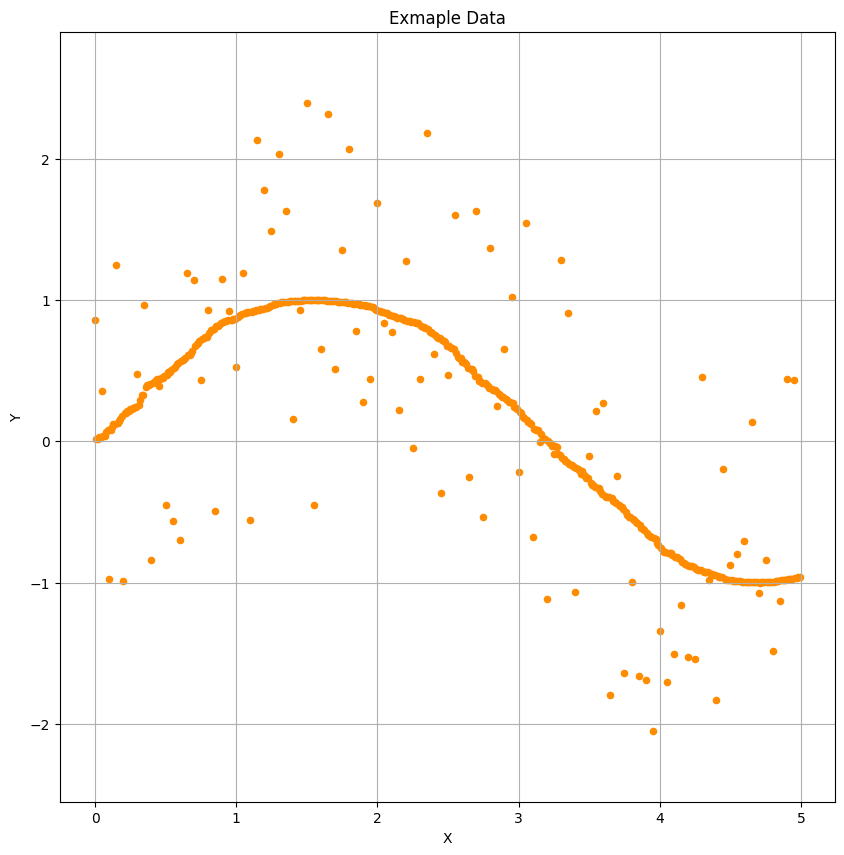

In [12]:
# 예제 데이터 로딩
rng = np.random.RandomState(123)
X_train = np.sort(5 * rng.rand(500, 1), axis=0)
Y_train = np.sin(X_train).ravel()         # sin 함수의 예측을 목표로 한다.
X_test = np.arange(0.0, 5.0, 5/X_train.shape[0])[:, np.newaxis]
Y_test = Y_train.copy()
Y_test[::5] = Y_test[::5] + 3 * (0.5 - rng.rand(100))

# 예제 데이터 시각화
plt.figure(figsize=(10, 10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.title('Exmaple Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid()
plt.show()

### Regression Modeling

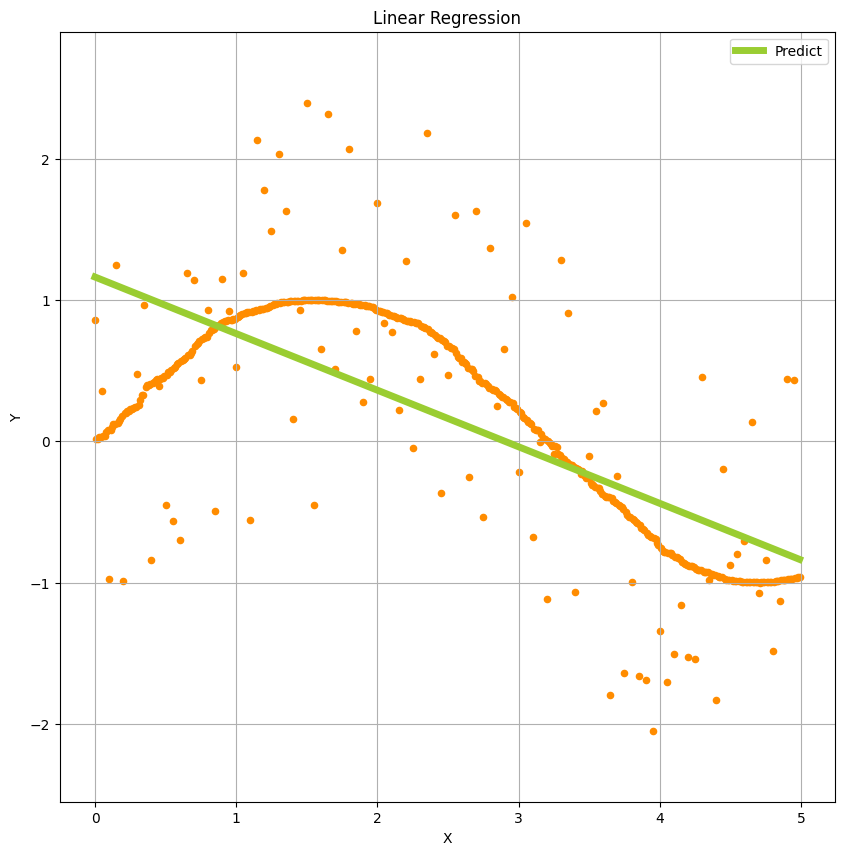

,MAE,MSE,MAPE
Train,0.361330,0.182094,7.257948
Test,0.446577,0.332987,1.623856


In [13]:
# 모델링: Linear Regression
## 학습
model_reg = LinearRegression()
model_reg.fit(X_train, Y_train)
## 예측
Y_trpred = model_reg.predict(X_train)
Y_tepred = model_reg.predict(X_test)
## 학습결과
plt.figure(figsize=(10, 10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_tepred, color='yellowgreen', linewidth=5, label='Predict')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

# 성능검증
eval_reg = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
eval_reg

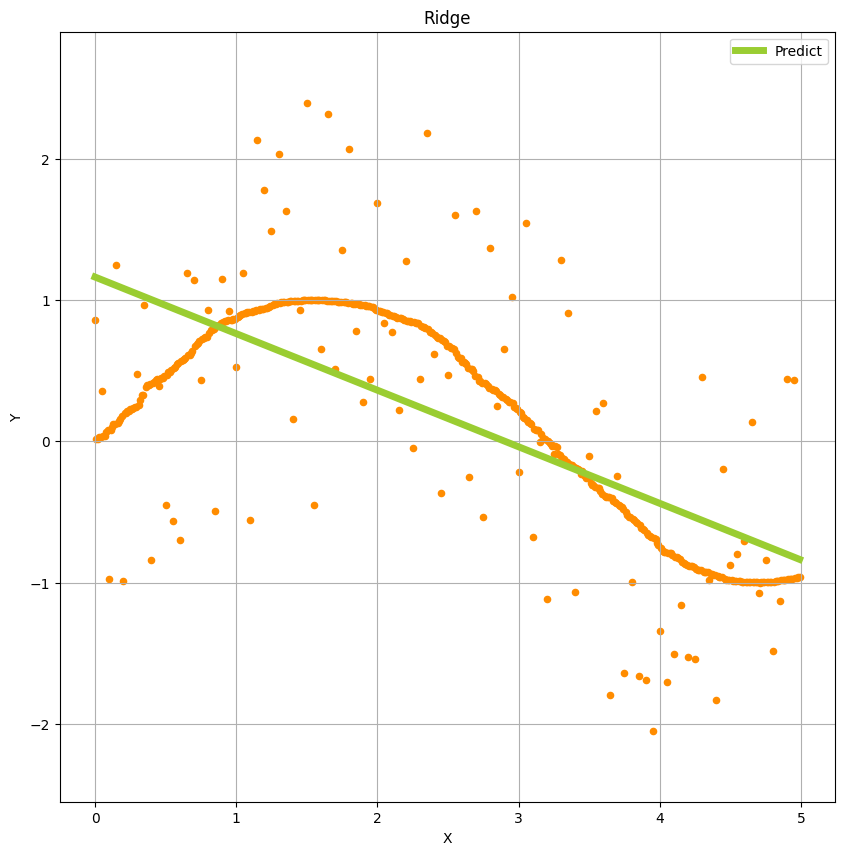

,MAE,MSE,MAPE
Train,0.361338,0.182094,7.257658
Test,0.446583,0.332986,1.623795


In [14]:
# 모델링: Ridge
## 학습
alpha_weight = 0.05
model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True, 
                    random_state=123)
model_ridge.fit(X_train, Y_train)
## 예측
Y_trpred = model_ridge.predict(X_train)
Y_tepred = model_ridge.predict(X_test)
## 학습결과
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_tepred, color='yellowgreen', linewidth=5, label='Predict')
plt.title('Ridge')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")
plt.grid()
plt.legend()
plt.show()

# 성능검증
eval_ridge = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
eval_ridge

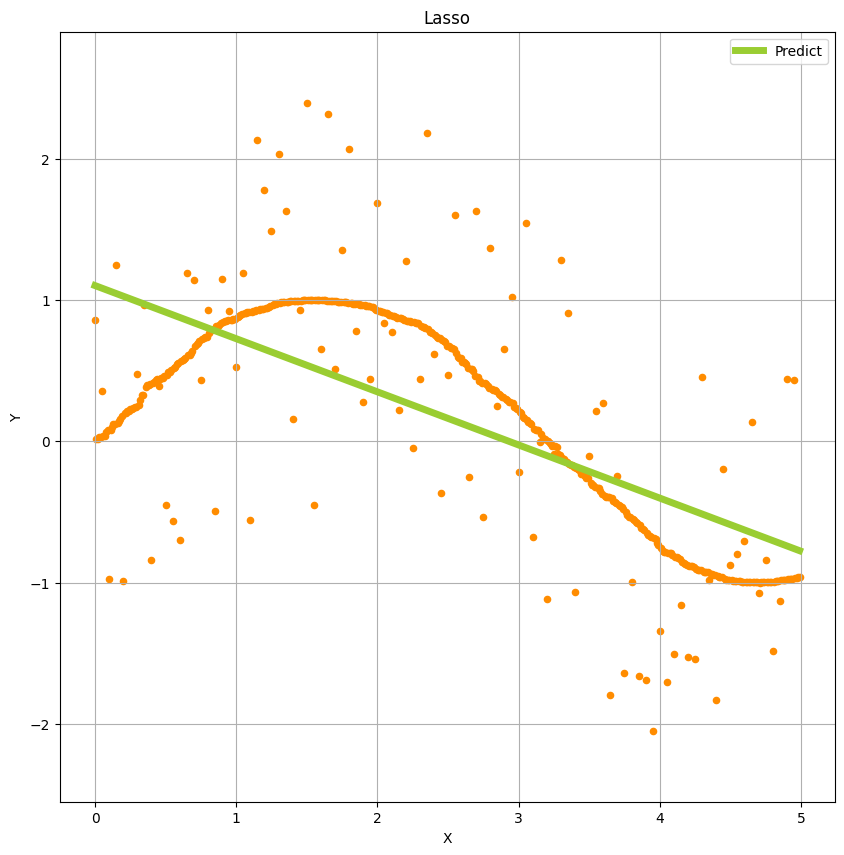

,MAE,MSE,MAPE
Train,0.371742,0.183316,6.896714
Test,0.454568,0.333242,1.548712


In [15]:
# 모델링 : Lasso
## 학습
alpha_weight = 0.05
model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True,
                    random_state=123)
model_lasso.fit(X_train, Y_train)
## 예측
Y_trpred = model_lasso.predict(X_train)
Y_tepred = model_lasso.predict(X_test)
## 학습결과
plt.figure(figsize=(10, 10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_tepred, color='yellowgreen', linewidth=5, label='Predict')
plt.title('Lasso')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

# 성능검증
eval_lasso = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
eval_lasso

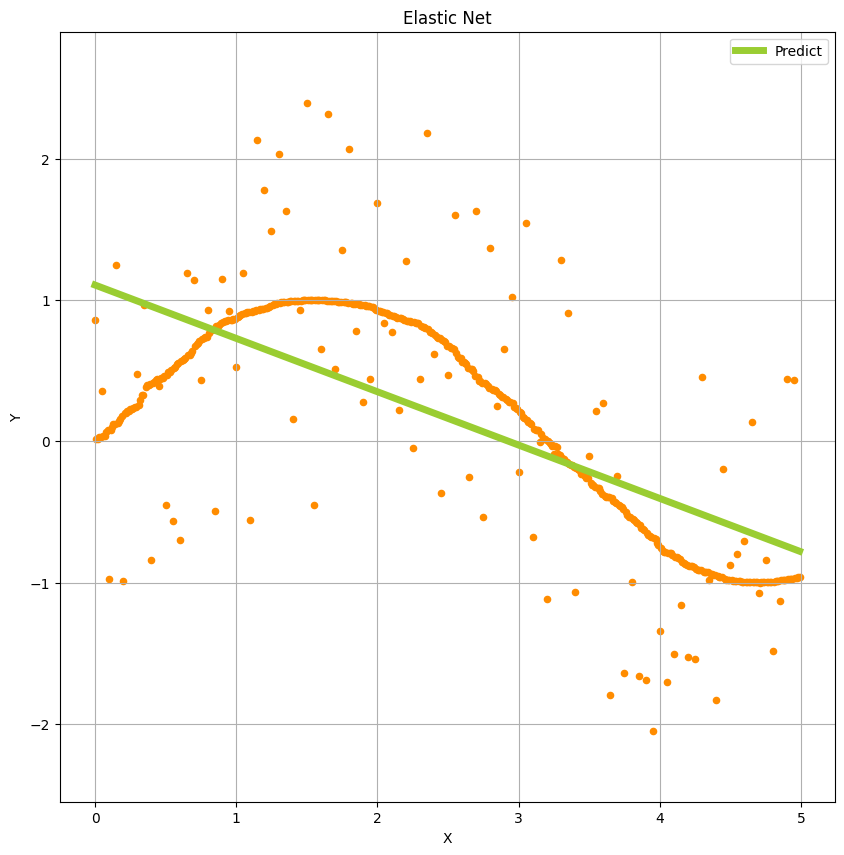

,MAE,MSE,MAPE
Train,0.371084,0.183169,6.919147
Test,0.454042,0.333153,1.553269


In [16]:
# 모델링 : Elastic Net
## 학습
model_en = ElasticNet(alpha=0.05, l1_ratio=0.9, fit_intercept=True,
                      random_state=123)
model_en.fit(X_train, Y_train)
## 예측
Y_trpred = model_en.predict(X_train)
Y_tepred = model_en.predict(X_test)
## 학습결과
plt.figure(figsize=(10, 10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_tepred, color='yellowgreen', linewidth=5, label='Predict')
plt.title('Elastic Net')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

# 성능검증
eval_en = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
eval_en

,MAE,MSE,MAPE
Linear,0.446577,0.332987,1.623856
Ridge,0.446583,0.332986,1.623795
Lasso,0.454568,0.333242,1.548712
Elastic Net,0.454042,0.333153,1.553269


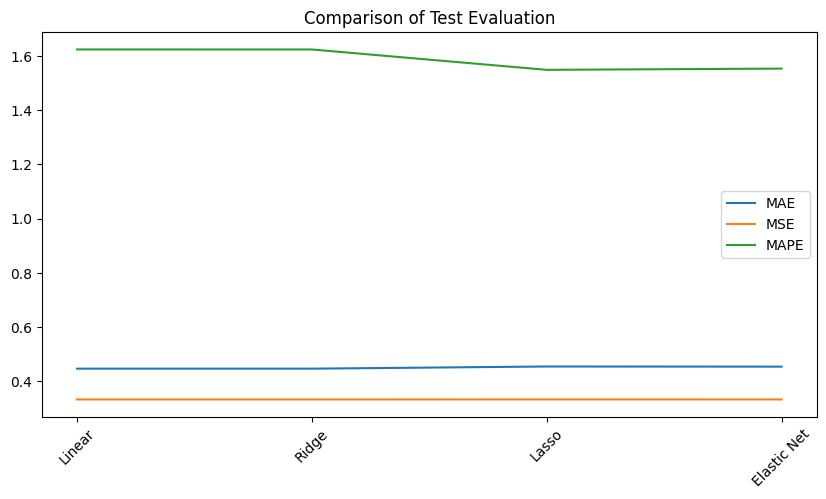

In [17]:
# 결과비교
labels = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']
models = [eval_reg, eval_ridge, eval_lasso, eval_en]
result_regression = pd.DataFrame()
for result in models:
    result_regression = pd.concat([result_regression, result.iloc[1:, :]], axis=0)
result_regression.index = labels
display(result_regression)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(result_regression)
plt.title('Comparison of Test Evaluation')
plt.xticks(rotation=45)
plt.legend(['MAE', 'MSE', 'MAPE'])
plt.show()

## 분류 문제

### Data Preprocessing

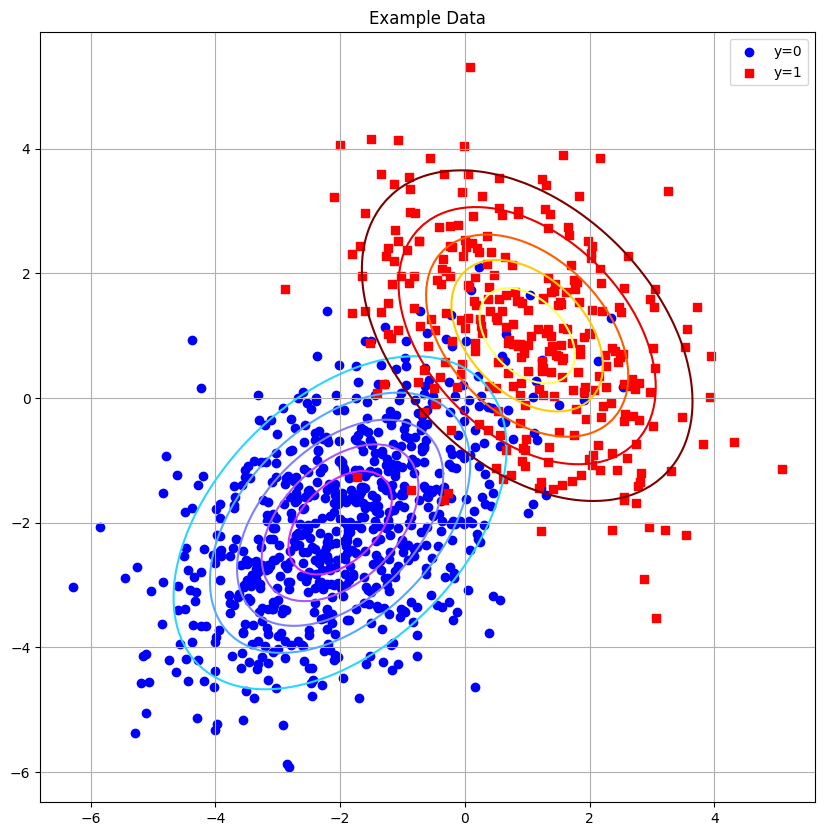

In [18]:
# 예제 데이터 로딩
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[2, 0.9], [0.9, 2]], seed=123)
rv1 = sp.stats.multivariate_normal([1, 1], [[2, -0.8], [-0.8, 2]], seed=123)
X0 = rv0.rvs(700)
X1 = rv1.rvs(300)
X = np.vstack([X0, X1])
Y = np.hstack([np.zeros(700), np.ones(300)])

# 예제 데이터 시각화
plt.figure(figsize=(10, 10))
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker='o', c='b', label='y=0')
plt.scatter(X1[:, 0], X1[:, 1], marker='s', c='r', label='y=1')
plt.legend()
plt.title('Example Data')
plt.axis('equal')
plt.grid()
plt.show()

In [19]:
# 데이터 분리 및 스케일링
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Classification Modeling

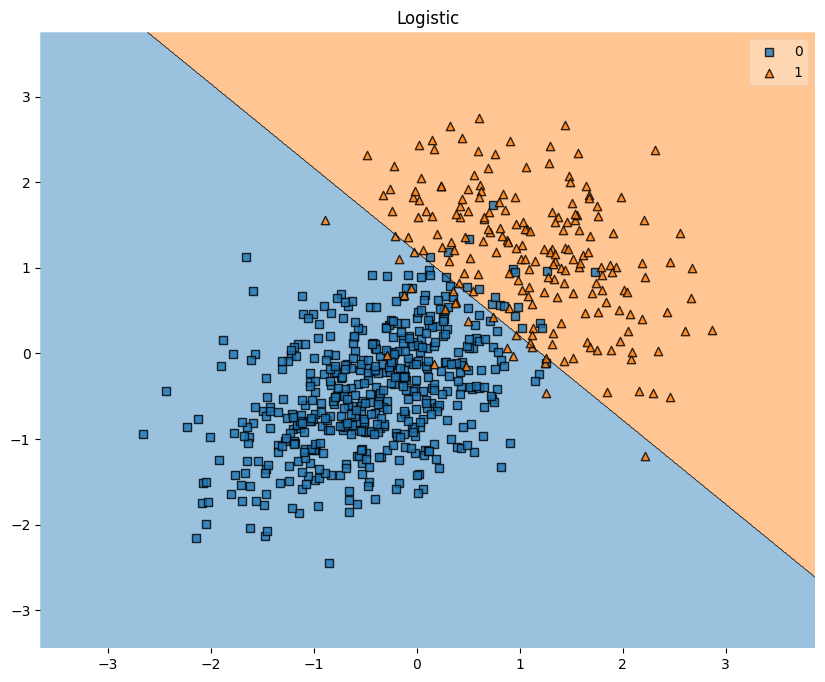

,Accuracy,AUC
Train,0.940000,0.922738
Test,0.916667,0.901804


In [20]:
# 모델링 : Logistic
## 학습
model_logitreg = LogisticRegression()
model_logitreg.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10, 8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_logitreg)
plt.title('Logistic')
plt.show()
## 예측
Y_trpred = model_logitreg.predict(X_train)
Y_tepred = model_logitreg.predict(X_test)

# 성능검증
eval_logitreg = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_logitreg

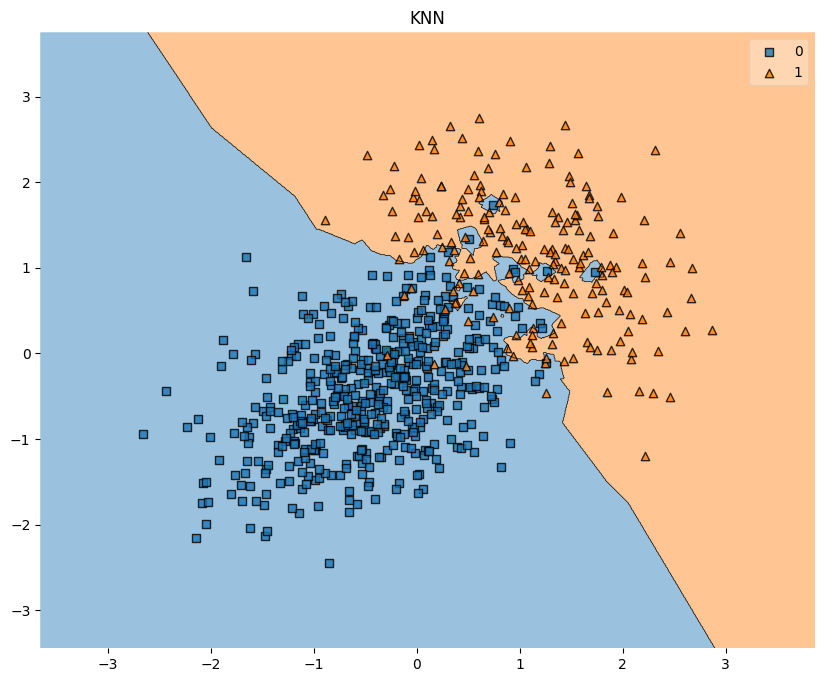

,Accuracy,AUC
Train,0.958571,0.926396
Test,0.913333,0.885368


In [21]:
# 모델링 : KNN
## 학습
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10, 8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_knn)
plt.title('KNN')
plt.show()
## 예측
Y_trpred = model_knn.predict(X_train)
Y_tepred = model_knn.predict(X_test)

# 성능검증
eval_knn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_knn

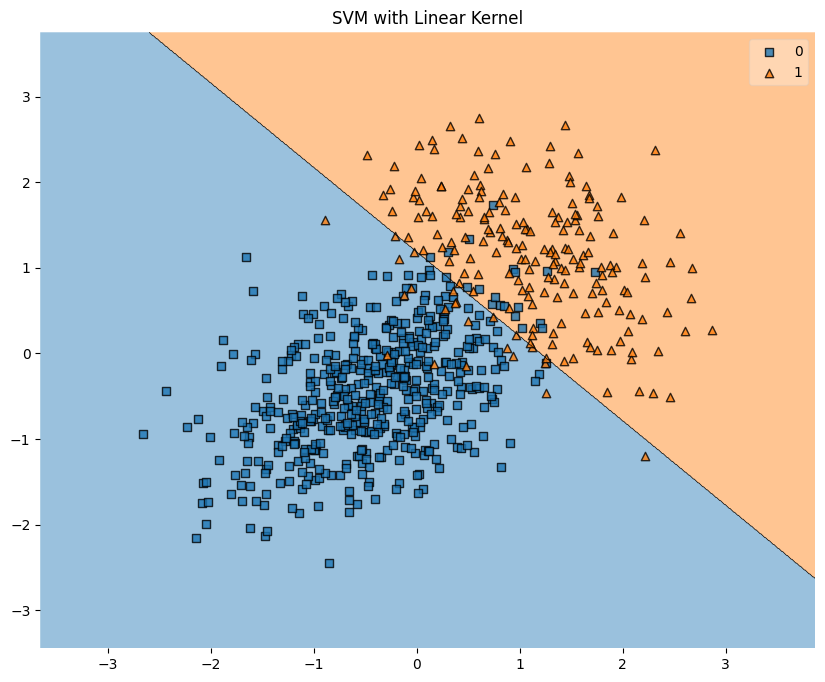

,Accuracy,AUC
Train,0.940000,0.922738
Test,0.916667,0.901804


In [22]:
# 모델링 : SVM with linear Kernel
## 학습
C = 1       # SVM의 정규화 hyperparameter
model_svm = SVC(kernel='linear', C=C, random_state=123)
model_svm.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10, 8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_svm)
plt.title('SVM with Linear Kernel')
plt.show()
## 예측
Y_trpred = model_svm.predict(X_train)
Y_tepred = model_svm.predict(X_test)

# 성능검증
eval_svm = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_svm

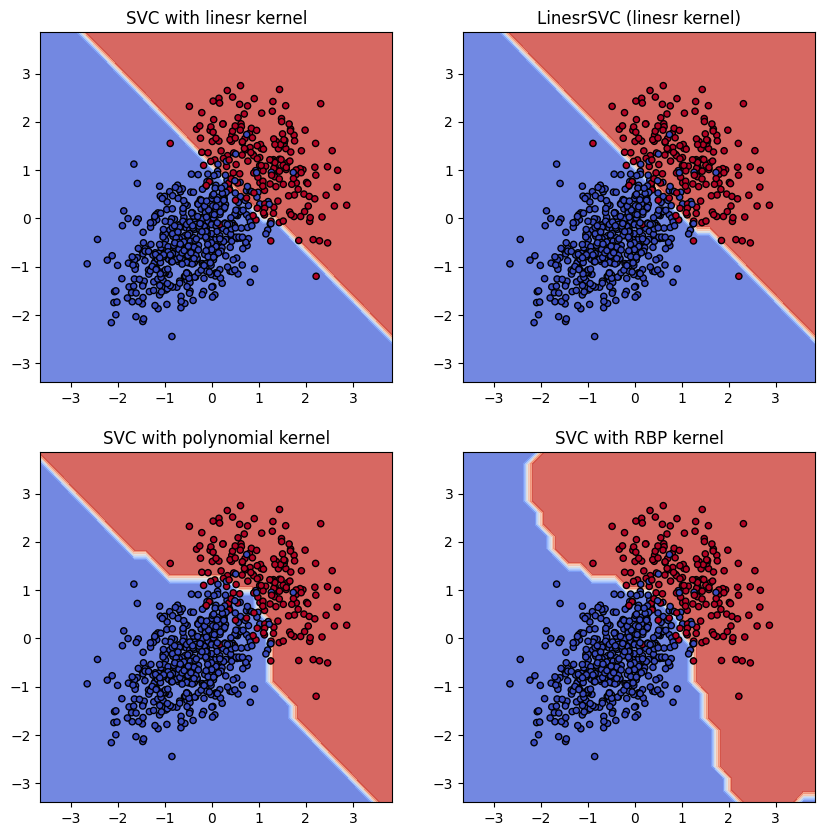

In [23]:
# SVM 선형 및 비선형 알고리즘 Classification 결과 비교
# kernel='linear' 대신 LinearSVC가 존재하지만 비용함수와 알고리즘 차이가있어 결과 차이 존재
# 모델링 정리
C = 1           # SVM의 정규화 hyperparameter
models = (SVC(kernel='linear', C=C), 
          LinearSVC(C=C, max_iter=10000),
          SVC(kernel='poly', gamma='auto', C=C),
          SVC(kernel='rbf', gamma='auto', C=C))
model_svm_kernel = (model_svm.fit(X_train, Y_train) for model_svm in models)

## 데이터 3차원 인식으로 재정리
X_train_min, X_train_max = X_train.min() - 1, X_train.max() + 1
X_test_min, X_test_max = X_test.min() - 1, X_test.max() + 1
xx, yy = np.meshgrid(np.arange(X_train_min, X_train_max, 0.25), np.arange(X_test_min, X_test_max, 0.25))

# 결과 비교 시각화
fig, sub = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, z, **params)
    return out

titles = ('SVC with linesr kernel', 'LinesrSVC (linesr kernel)',
          'SVC with polynomial kernel', 'SVC with RBP kernel')
for clf, title, ax in zip(model_svm_kernel, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, 
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolor='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
plt.show()

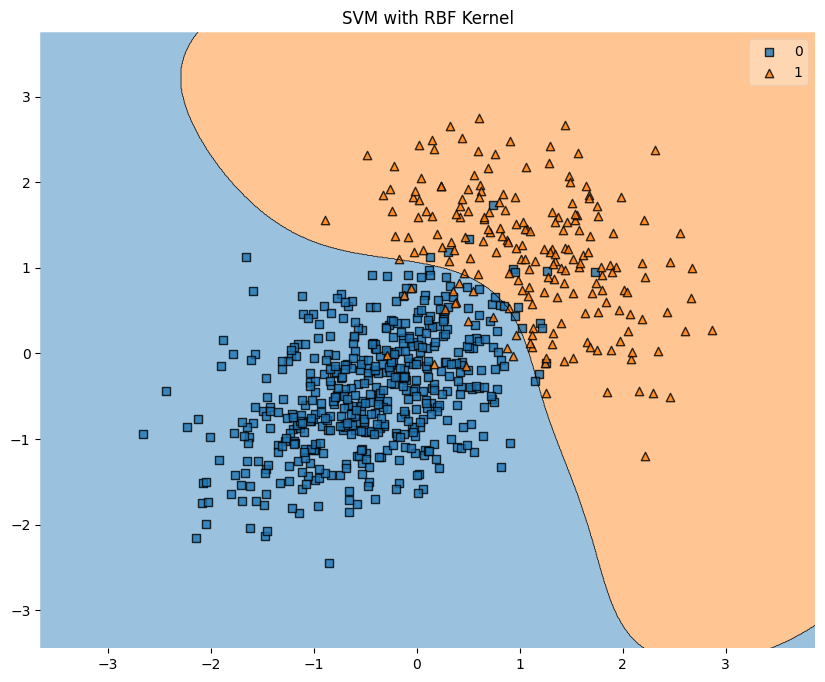

,Accuracy,AUC
Train,0.955714,0.944480
Test,0.916667,0.901804


In [24]:
# 모델링 : SVM with RBF Kernel
## 학습
C = 1           # SVM의 정규화 hyperparameter
model_svmr = SVC(kernel='rbf', C=C, random_state=123)
model_svmr.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10, 8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_svmr)
plt.title('SVM with RBF Kernel')
plt.show()
## 예측
Y_trpred = model_svmr.predict(X_train)
Y_tepred = model_svmr.predict(X_test)

# 성능검증
eval_svmr = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_svmr

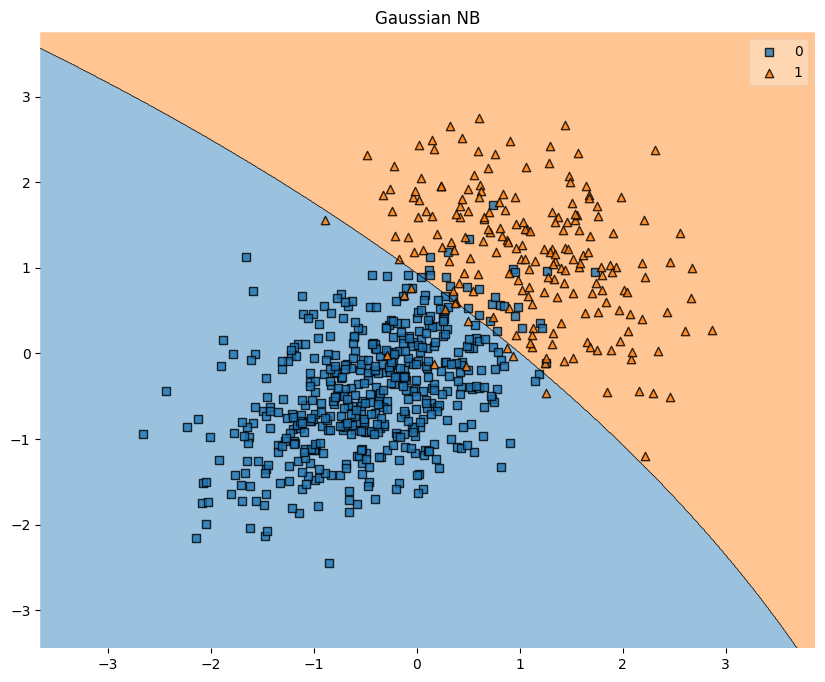

,Accuracy,AUC
Train,0.941429,0.940716
Test,0.920000,0.915923


In [25]:
# 모델링 : NB
## 학습
model_gnb = GaussianNB()
model_gnb.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10, 8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_gnb)
plt.title('Gaussian NB')
plt.show()
## 예측
Y_trpred = model_gnb.predict(X_train)
Y_tepred = model_gnb.predict(X_test)

# 성능 검증
eval_gnb = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_gnb

,Accuracy,AUC
Logistic,0.916667,0.901804
KNN,0.913333,0.885368
SVM_Linear,0.916667,0.901804
SVM_RBF,0.916667,0.901804
NB,0.920000,0.915923


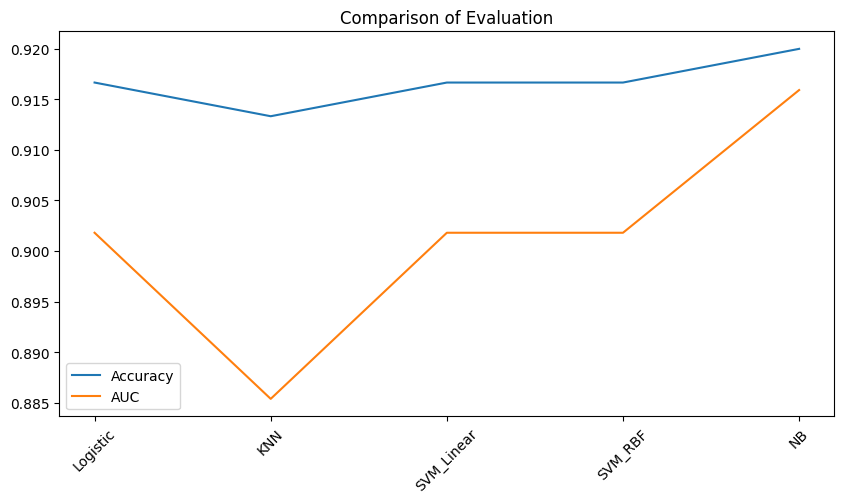

In [26]:
# 결과비교
labels = ['Logistic', 'KNN', 'SVM_Linear', 'SVM_RBF', 'NB']
models = [eval_logitreg, eval_knn, eval_svm, eval_svmr, eval_gnb]

result_classification = pd.DataFrame()

for result in models:
    result_classification = pd.concat([result_classification, result.iloc[1:, :]], axis=0)
result_classification.index = labels
display(result_classification)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(result_classification)
plt.title('Comparison of Evaluation')
plt.xticks(rotation=45)
plt.legend(['Accuracy', 'AUC'])
plt.show()